In [16]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('NHL_Standings23.csv', header=0, error_bad_lines=False)
east = df[df['Conference']=='Eastern']
west = df[df['Conference']=='Western']

east.head()

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
0,1,Eastern,Boston Bruins,77,60,12,5,125,1.623,286,166,120,3.71,2.16,1.558,22.3,86.9,93.12
1,2,Eastern,Carolina Hurricanes,76,49,18,9,107,1.408,248,196,52,3.26,2.58,0.684,20.5,84.0,90.73
2,3,Eastern,New Jersey Devils,77,48,21,8,104,1.351,266,216,50,3.45,2.81,0.649,21.4,82.0,90.67
4,5,Eastern,New York Rangers,77,45,21,11,101,1.312,261,207,54,3.39,2.69,0.701,22.8,80.8,91.22
5,6,Eastern,Toronto Maple Leafs,76,45,21,10,100,1.316,258,211,47,3.39,2.78,0.618,25.7,80.5,91.00


In [18]:
historical_champs_10Y_df = pd.read_csv('historical_data_predictive_model.csv')
winning_teams = historical_champs_10Y_df[historical_champs_10Y_df['Team'] != 'League Average']
league_averages = historical_champs_10Y_df[historical_champs_10Y_df['Team'] == 'League Average']
stanley_cup_winners = historical_champs_10Y_df[historical_champs_10Y_df['Stanley_Cup_Champion'] == 1]
historical_champs_10Y_df

,Rk_adv,Team,S%_adv,SV%_adv,PDO,CF,CA,CF%,FF,FA,...,SHA,PIM/G,oPIM/G,S,S%_reg,SA,SV%_reg,SO,Stanley_Cup_Champion,Year
0,1,Washington Capitals*,8.4,0.941,102.5,3658,3405,51.8,2696,2546,...,3,9.1,8.7,2495,10.5,2282,0.922,12,0,2017
1,2,Pittsburgh Penguins*,7.9,0.932,101.0,3810,3788,50.1,2874,2735,...,7,8.6,9.0,2745,10.1,2671,0.914,5,1,2017
2,3,Chicago Blackhawks*,7.6,0.937,101.3,3779,3713,50.4,2713,2716,...,7,7.1,7.9,2508,9.6,2574,0.918,4,0,2017
3,4,Columbus Blue Jackets*,7.6,0.936,101.2,3719,3677,50.3,2772,2727,...,2,8.7,8.6,2540,9.7,2489,0.922,8,0,2017
4,5,Minnesota Wild*,8.4,0.931,101.5,3650,3744,49.4,2769,2778,...,3,8.2,8.4,2527,10.4,2465,0.916,5,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,28,New Jersey Devils,8.0,0.905,98.6,3801,3734,50.4,2888,2874,...,14,8.1,8.4,2562,9.6,2540,0.881,2,0,2022
182,29,Philadelphia Flyers,7.6,0.919,99.5,3403,3895,46.6,2564,2921,...,11,9.0,9.0,2539,8.3,2785,0.894,1,0,2022
183,30,Seattle Kraken,7.5,0.908,98.3,3508,3415,50.7,2615,2593,...,7,8.5,8.0,2380,8.9,2367,0.880,3,0,2022
184,31,Arizona Coyotes,8.6,0.910,99.7,3118,3977,43.9,2346,3052,...,4,10.2,8.2,2121,9.7,2910,0.894,1,0,2022


# Goals for vs Goals against for each playoff team

What i did was plot the goals for vs goals against for each playoff team to see which team has the highest margin.
The boston Bruins did.

<AxesSubplot:xlabel='Team', ylabel='Goals For'>

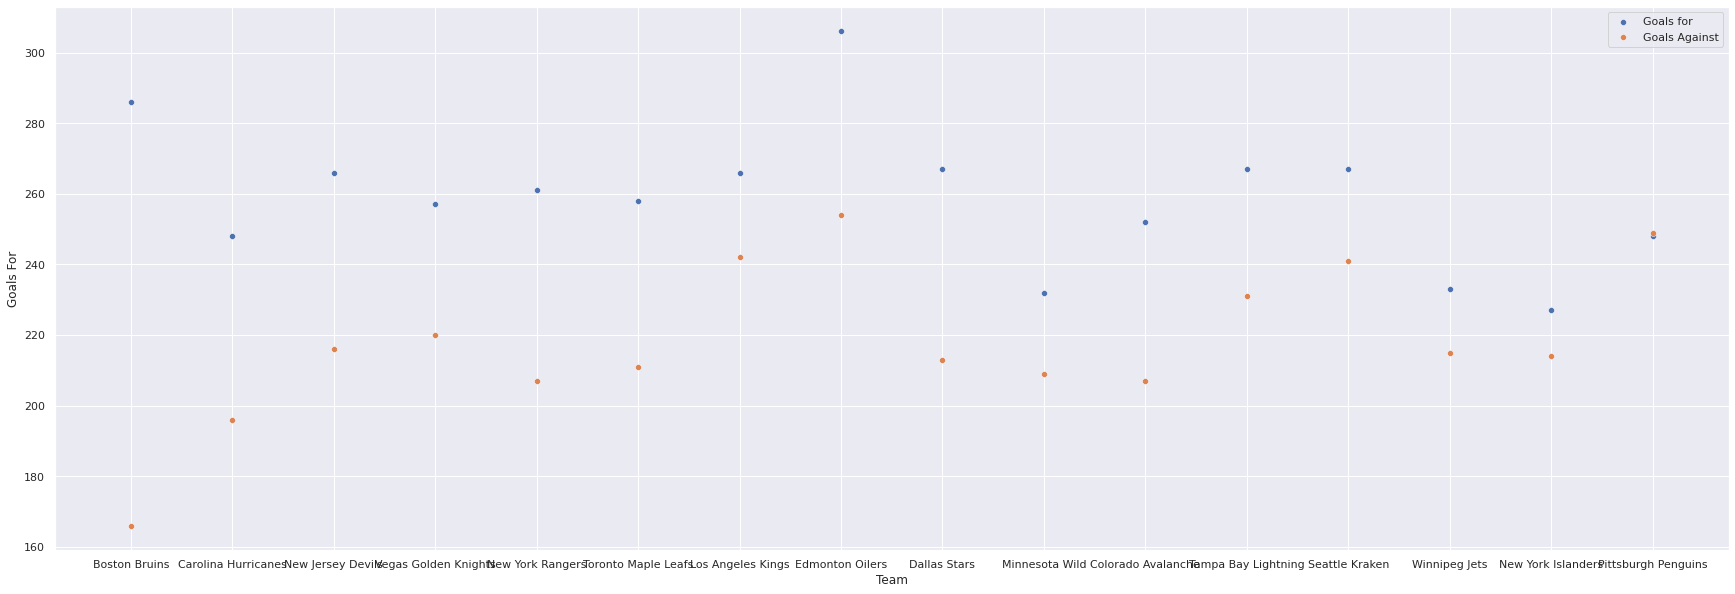

In [20]:
sns.set(rc={'figure.figsize':(30,10)})
sns.scatterplot(data=df, x="Team", y="Goals For", label = 'Goals for', markers = True)
sns.scatterplot(data=df, x="Team", y="Goals Against", label = 'Goals Against',markers = True)

<AxesSubplot:xlabel='Team', ylabel='Goal Differential'>

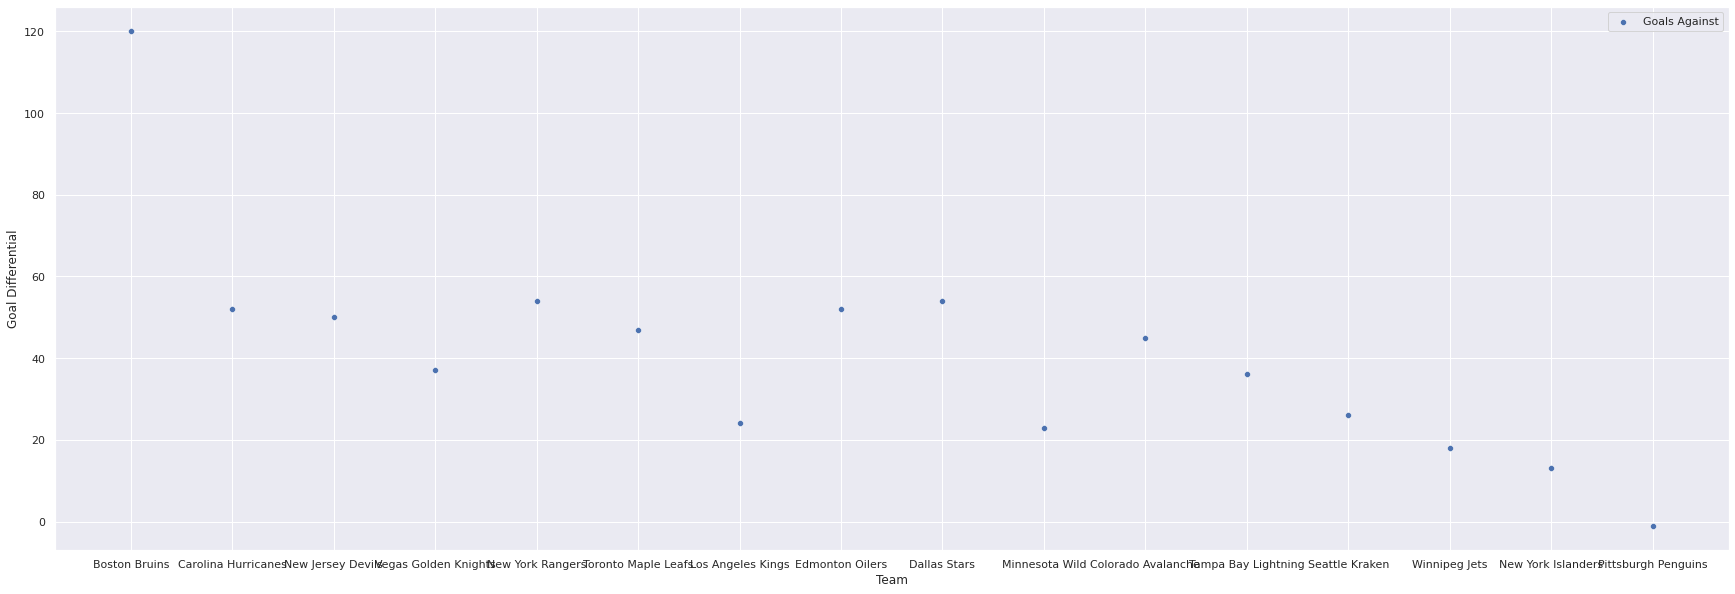

In [32]:
sns.scatterplot(data=df, x="Team", y="Goal Differential", label = 'Goals Against',markers = True)

In [23]:
stanley_cup_winners['PTS']/stanley_cup_winners['GP']

1      1.353659
35     1.280488
72     1.207317
94     1.314286
130    1.339286
155    1.451220
dtype: float64

In [29]:
ppg2022= df['Points']/df['Games Played']
ppg2022

0     1.623377
1     1.407895
2     1.350649
3     1.337662
4     1.311688
5     1.315789
6     1.298701
7     1.285714
8     1.272727
9     1.272727
10    1.280000
11    1.246753
12    1.210526
13    1.155844
14    1.115385
15    1.116883
dtype: float64

The average points per game for each team slowly goes down as the the seeding gets lower, with the boston bruins at top

In [22]:
df

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
0,1,Eastern,Boston Bruins,77,60,12,5,125,1.623,286,166,120,3.71,2.16,1.558,22.3,86.9,93.12
1,2,Eastern,Carolina Hurricanes,76,49,18,9,107,1.408,248,196,52,3.26,2.58,0.684,20.5,84.0,90.73
2,3,Eastern,New Jersey Devils,77,48,21,8,104,1.351,266,216,50,3.45,2.81,0.649,21.4,82.0,90.67
3,4,Western,Vegas Golden Knights,77,48,22,7,103,1.338,257,220,37,3.34,2.86,0.481,20.7,77.5,91.43
4,5,Eastern,New York Rangers,77,45,21,11,101,1.312,261,207,54,3.39,2.69,0.701,22.8,80.8,91.22
5,6,Eastern,Toronto Maple Leafs,76,45,21,10,100,1.316,258,211,47,3.39,2.78,0.618,25.7,80.5,91.00
6,7,Western,Los Angeles Kings,77,45,22,10,100,1.299,266,242,24,3.45,3.14,0.312,25.3,75.7,89.14
7,8,Western,Edmonton Oilers,77,45,23,9,99,1.286,306,254,52,3.97,3.30,0.675,32.4,76.1,90.06
8,9,Western,Dallas Stars,77,42,21,14,98,1.273,267,213,54,3.47,2.77,0.701,24.0,83.2,91.48
9,10,Western,Minnesota Wild,77,44,23,10,98,1.273,232,209,23,3.01,2.71,0.299,21.7,81.3,91.96


<AxesSubplot:xlabel='Team', ylabel='S%_reg'>

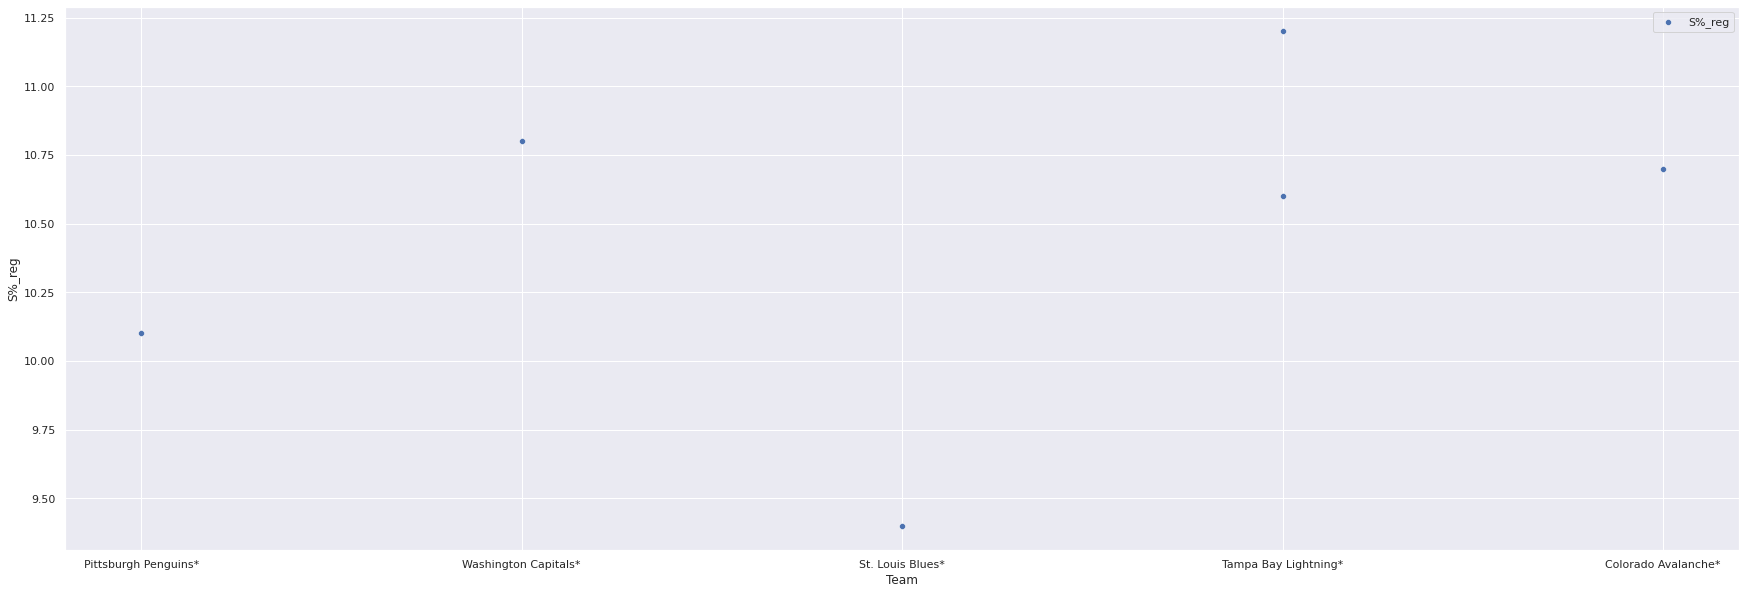

In [36]:
sns.scatterplot(data=stanley_cup_winners, x="Team", y="S%_reg", label = 'S%_reg', markers = True)

In [33]:
stanley_cup_winners

,Rk_adv,Team,S%_adv,SV%_adv,PDO,CF,CA,CF%,FF,FA,...,SHA,PIM/G,oPIM/G,S,S%_reg,SA,SV%_reg,SO,Stanley_Cup_Champion,Year
1,2,Pittsburgh Penguins*,7.9,0.932,101.0,3810,3788,50.1,2874,2735,...,7,8.6,9.0,2745,10.1,2671,0.914,5,1,2017
35,6,Washington Capitals*,8.5,0.930,101.4,3618,3923,48.0,2659,2958,...,8,9.8,9.2,2379,10.8,2613,0.909,3,1,2018
72,12,St. Louis Blues*,7.5,0.927,100.2,3718,3501,51.5,2786,2571,...,7,7.6,8.2,2604,9.4,2345,0.906,9,1,2019
94,3,Tampa Bay Lightning*,8.8,0.930,101.9,3113,2856,52.2,2331,2197,...,7,10.3,9.9,2176,11.2,2165,0.910,4,1,2020
130,8,Tampa Bay Lightning*,8.0,0.928,100.8,2231,2026,52.4,1702,1558,...,3,10.7,10.9,1692,10.6,1583,0.908,6,1,2021
155,2,Colorado Avalanche*,8.5,0.927,101.2,3847,3411,53.0,2800,2583,...,5,9.0,10.4,2874,10.7,2625,0.912,7,1,2022
